In [29]:
from pytrends.request import TrendReq

import pandas as pd

import numpy as np

In [5]:
df_category = pd.read_parquet('./data/sephora_historical_data_april_2020.parquet')

In [19]:
kw_list = df_category['category'].unique()

In [4]:
proxies = [     '167.99.218.191:8080',
'144.217.254.175:3128', 
'165.225.77.47:9443',
'54.37.137.211:3128', '165.22.91.197:8080',
'165.225.77.47:8800', '165.225.77.47:9400',
'165.225.77.47:80', '165.225.77.47:443',
'143.198.222.22:8080', '143.198.206.183:8080', '157.230.208.88:8080',
]

In [20]:
len(kw_list)

143

In [ ]:
pytrends = TrendReq(hl='en-US', 
                tz=360, timeout=(10,25), 
#                 proxies=proxies[8:], 
                retries=2, backoff_factor=0.1, requests_args={'verify':False})

In [ ]:
df_lst = []
for i in kw_list:
    pytrends.build_payload([i], cat=44, timeframe='today 5-y', geo='US')
    df = pytrends.interest_over_time()
    df_lst.append(df)

In [25]:
df_final = pd.concat(df_lst, axis = 1)

In [37]:
col = list(np.unique(list(df_final.columns)))

In [38]:
col.remove('isPartial')

In [39]:
df_final[col]

,Accessories,After Sun Care,Aftershave,Anti-Aging,Bath & Body,Bath & Shower,Beauty Supplements,Blotting Papers,Blush,Body Moisturizers,...,Sheet Masks,Skincare,Skincare Sets,Spa Tools,Sunscreen,Teeth Whitening,Tinted Moisturizer,Toners,Wellness,no category
date,,,,,,,,,,,,,,,,,,,,,
2016-04-17,43,22,48,50,4,0,0,0,82,28,...,50,18,0,37,41,57,36,15,54,0
2016-04-24,54,0,50,56,3,53,0,0,76,0,...,25,20,0,0,35,51,30,34,56,0
2016-05-01,54,44,68,52,5,0,0,0,74,0,...,37,21,21,0,30,60,37,38,59,0
2016-05-08,47,22,57,59,5,54,27,36,75,0,...,12,20,21,0,33,76,49,46,54,0
2016-05-15,50,23,40,57,4,82,27,0,71,56,...,0,20,21,0,36,24,24,16,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,56,57,52,58,18,0,0,0,98,47,...,21,62,0,0,59,76,69,61,67,0
2021-03-14,55,35,43,47,17,43,0,29,95,22,...,20,57,17,0,61,78,91,36,67,0
2021-03-21,50,38,39,48,17,23,22,31,95,47,...,21,60,18,32,68,48,84,51,67,0


In [158]:
df_final = df_final[col].copy()

In [190]:
df_final['month'] = df_final.index.month

In [191]:
df_final['day'] = df_final.index.day

In [192]:
df_final['weeknbr'] = df_final.index.isocalendar().week

In [193]:
df_final['year'] = df_final.index.year

In [194]:
df_final['labels'] = pd.cut(df_final.index, bins = [pd.to_datetime('2019-04-01'), pd.to_datetime('2020-04-01'), 
                               pd.to_datetime('2021-04-01')], 
       labels = ['pre-pandemic', 'pandemic'])

In [195]:
df_final.to_parquet('./data/google_trends.parquet')

### Part 2- Analysis

In [196]:
# Analysis

In [187]:
df_compare = df_final.reset_index()\
.dropna(subset = ['labels'])\
.sort_values(by = ['weeknbr', 'labels'])\
.set_index(['weeknbr', 'labels']).diff()

In [188]:
# df_compare

In [170]:
df_compare_month = df_final.reset_index()\
.dropna(subset = ['labels'])\
.groupby(['month', 'labels']).sum().diff()

In [172]:
df_compare_month.head()

Accessories  After Sun Care  Aftershave  Anti-Aging  \
month labels                                                              
1     pre-pandemic          NaN             NaN         NaN         NaN   
      pandemic             85.0             1.0        80.0       -37.0   
2     pre-pandemic        -93.0            16.0       -66.0        79.0   
      pandemic             13.0            42.0       -21.0       -62.0   
3     pre-pandemic         35.0             6.0        19.0        19.0   

                    Bath & Body  Bath & Shower  Beauty Supplements  \
month labels                                                         
1     pre-pandemic          NaN            NaN                 NaN   
      pandemic             36.0           95.0               -18.0   
2     pre-pandemic        -38.0          -53.0                16.0   
      pandemic             11.0          -33.0               -38.0   
3     pre-pandemic         27.0            6.0               -44.0   

                    Blotting Papers  Blush  Body Moisturizers  ...  Spa Tools  \
month labels                                                   ...              
1     pre-pandemic              NaN    NaN                NaN  ...        NaN   
      pandemic                  2.0   89.0               98.0  ...      -56.0   
2     pre-pandemic             26.0  -60.0             -185.0  ...       26.0   
      pandemic                -25.0  -11.0               74.0  ...       37.0   
3     pre-pandemic             20.0    2.0              -34.0  ...      -39.0   

                    Sunscreen  Teeth Whitening  Tinted Moisturizer  Toners  \
month labels                                                                 
1     pre-pandemic        NaN              NaN                 NaN     NaN   
      pandemic           75.0            100.0                47.0    16.0   
2     pre-pandemic      -53.0            -68.0                24.0   -77.0   
      pandemic           52.0            -20.0               -75.0     8.0   
3     pre-pandemic      -28.0             14.0                81.0   107.0   

                    Wellness  no category   day     weeknbr    year  
month labels                                                         
1     pre-pandemic       NaN          NaN   NaN        <NA>     NaN  
      pandemic          56.0          0.0  23.0          53  2025.0  
2     pre-pandemic     -43.0         39.0 -35.0  4294967259 -2025.0  
      pandemic         -33.0        -39.0  20.0           0     4.0  
3     pre-pandemic       3.0          0.0   5.0          29  2016.0  

[5 rows x 111 columns]

In [173]:
df_compare_year = df_final.reset_index()\
.dropna(subset = ['labels'])\
.groupby(['labels'])\
.sum().diff()

In [174]:
df_compare_year

,Accessories,After Sun Care,Aftershave,Anti-Aging,Bath & Body,Bath & Shower,Beauty Supplements,Blotting Papers,Blush,Body Moisturizers,...,Sunscreen,Teeth Whitening,Tinted Moisturizer,Toners,Wellness,no category,month,day,weeknbr,year
labels,,,,,,,,,,,,,,,,,,,,,
pre-pandemic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
pandemic,529.0,27.0,155.0,-254.0,443.0,291.0,3.0,-13.0,-41.0,407.0,...,271.0,479.0,-29.0,673.0,-335.0,31.0,-5.0,52.0,40,52.0


<AxesSubplot:>

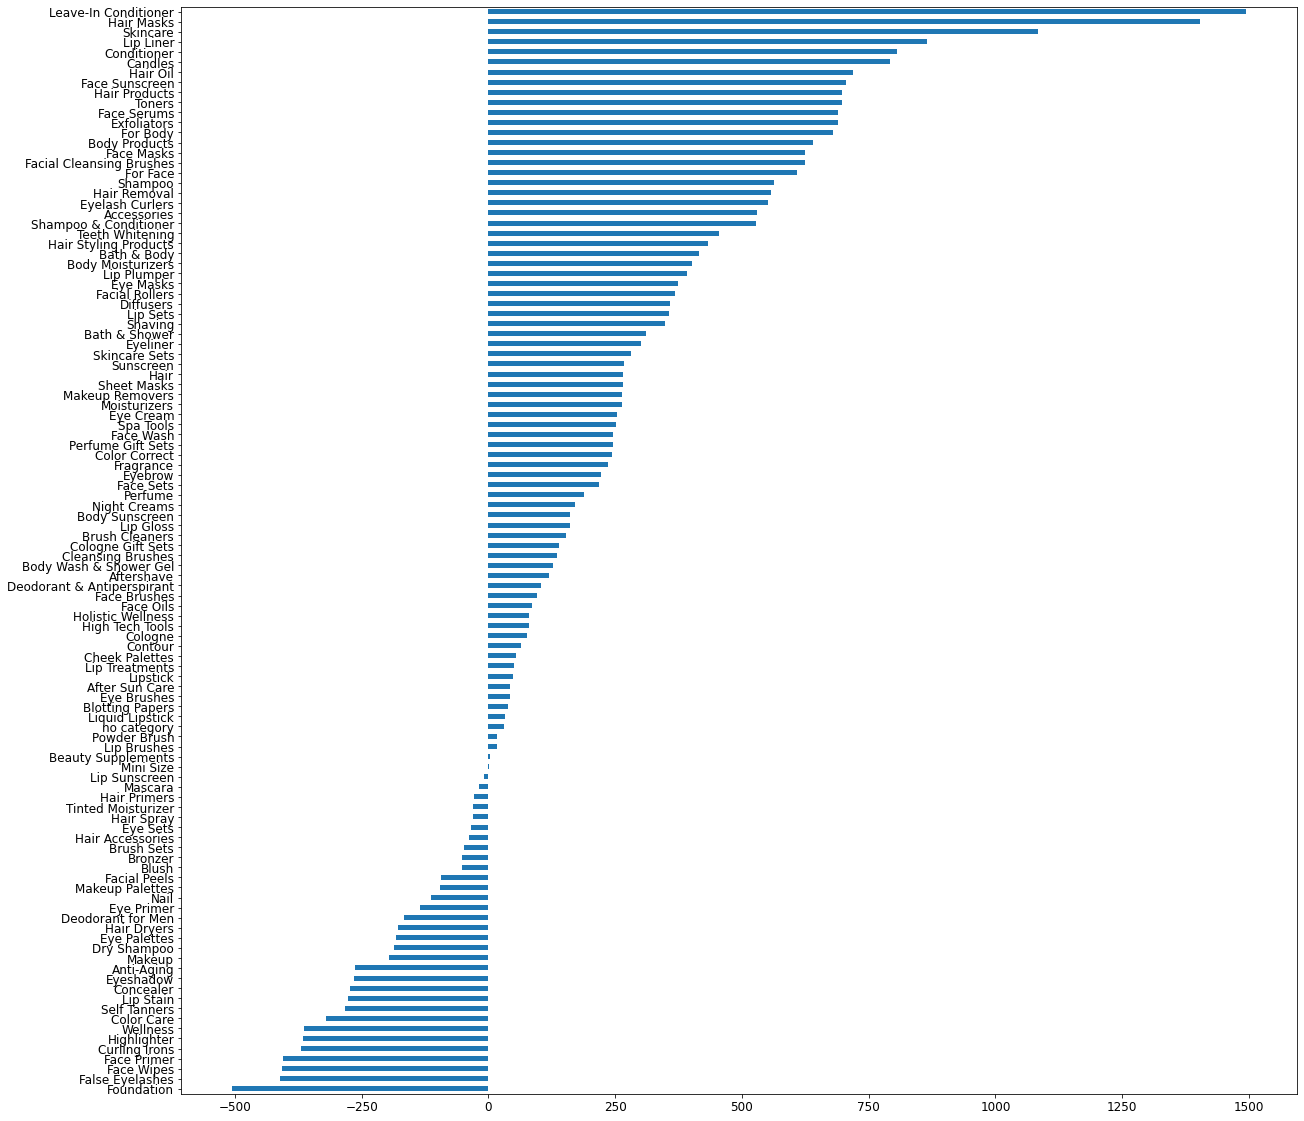

In [189]:
df_compare[df_compare.index.isin(['pandemic'], level='labels')][col].sum().sort_values(ascending = True)\
.plot(kind = 'barh', figsize = (20,20), fontsize = 12)

<AxesSubplot:>

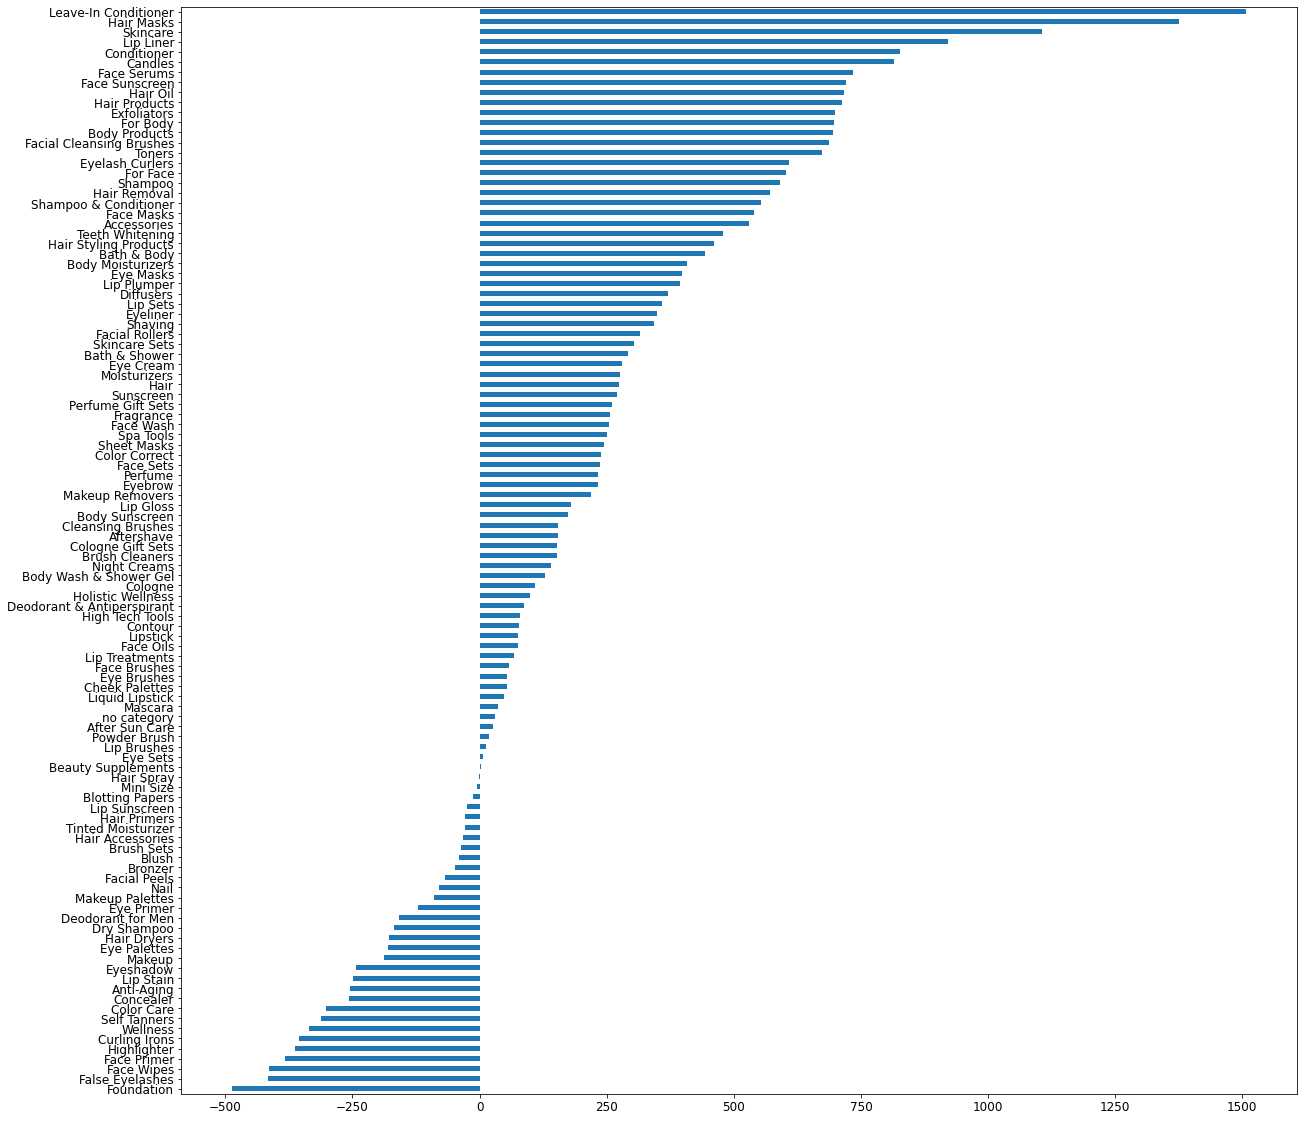

In [182]:
df_compare_month[df_compare_month.index.isin(['pandemic'], level='labels')][col].sum().sort_values(ascending = True)\
.plot(kind = 'barh', figsize = (20,20), fontsize = 12)

<AxesSubplot:>

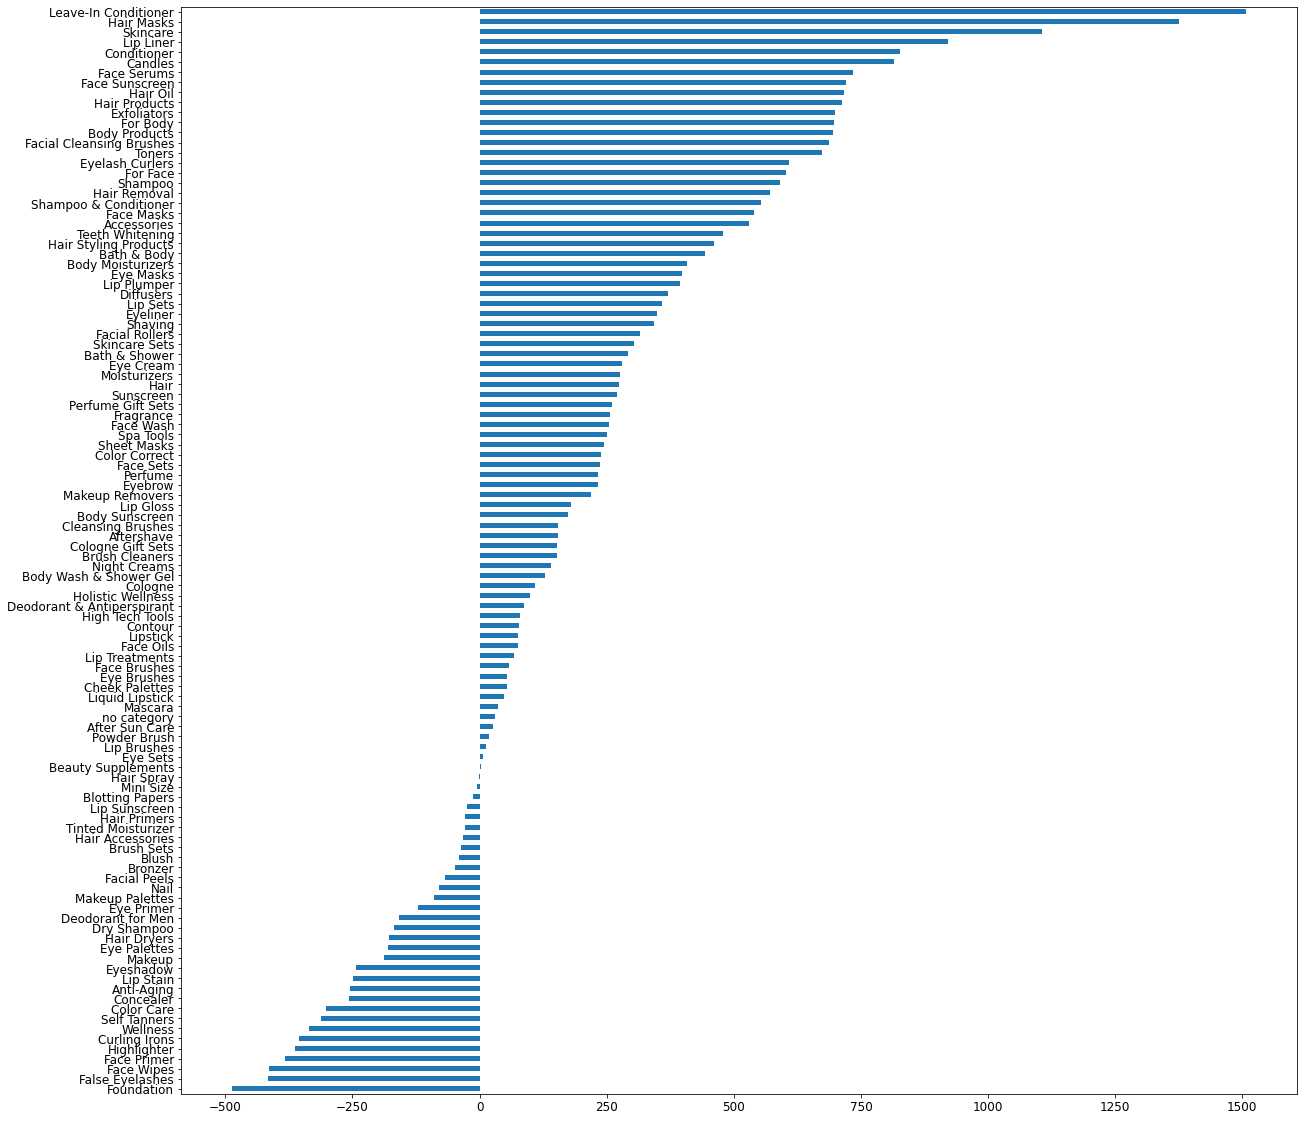

In [186]:
df_compare_year[df_compare_year.index.isin(['pandemic'], level='labels')][col].sum().sort_values(ascending = True)\
.plot(kind = 'barh', figsize = (20,20), fontsize = 12)